In [1]:
#import libs
import pandas as pd
import numpy as np

#read dataset
df=pd.read_csv('original.csv')
drops=['clientid']
df.drop(drops,inplace=True,axis=1)
df

C:\Users\abdal\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abdal\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\abdal\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


In [2]:
#dataset analysis
print(df[df['default']==1].count()) #//283
print(df[df['default']==0].count()) #//1717 (unbalanced data............)
print(df.isnull().any()) #//null values in age column only


income     283
age        283
loan       283
default    283
dtype: int64
income     1717
age        1714
loan       1717
default    1717
dtype: int64
income     False
age         True
loan       False
default    False
dtype: bool


In [3]:
print(df[df['age']<0])#negative values only here
print(df[df['loan']<0])
print(df[df['income']<0])

          income        age         loan  default
15  50501.726689 -28.218361  3977.287432        0
21  32197.620701 -52.423280  4244.057136        0
26  63287.038908 -36.496976  9595.286289        0
Empty DataFrame
Columns: [income, age, loan, default]
Index: []
Empty DataFrame
Columns: [income, age, loan, default]
Index: []


In [4]:
#remove negative values from age column
df['age']=np.where(df['age']<0,df['age']*-1,df['age'])
df['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [5]:
# impute dataset and replace null values
df['age'].fillna(df['age'].mean(),inplace=True)
df['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [6]:
#split dataset into features and label
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [7]:
from sklearn.feature_selection import chi2
chi2(X,y)
#all features are relative to the output

(array([4.72271990e+01, 1.69902240e+03, 5.93395636e+05]),
 array([6.32170996e-12, 0.00000000e+00, 0.00000000e+00]))

In [8]:
#test the model without cluster_num paramter
X_wc=X
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_wc_train, X_wc_test, y_train, y_test = train_test_split(X_wc, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_wc_train)
X_test=sc.fit_transform(X_wc_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_wc_train, y_train)

y_pred=model.predict(X_wc_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#accuarcy without cluster_number is 94.1%
#recall is 95%



[[343   5]
 [ 18  34]]


In [9]:
X_wc_train

,income,age,loan
582,30991.431924,34.010026,4589.267265
159,31847.853719,41.416336,2913.769931
1827,24112.499394,35.971338,3285.499948
318,43777.518480,20.010928,3601.299685
708,40334.616734,45.886542,6808.869955
...,...,...,...
835,29496.594127,54.665821,2216.975334
1216,31044.391757,49.935868,4465.872769
1653,48445.113124,38.979568,8733.442215
559,53741.371019,49.729433,6513.150125


In [42]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Dropout


model=Sequential([Dense(3,activation='relu'),
                 
                 Dense(16,activation='relu'),
                 

                 Dense(32,activation='relu'),
                

                 Dense(1,activation='sigmoid'),
                 
                 ])
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
history=model.fit(X_wc_train, y_train,validation_data=(X_wc_test,y_test), batch_size = 128, epochs = 200,verbose=2)


Epoch 1/200
13/13 - 0s - loss: 422.2873 - acc: 0.2019 - val_loss: 70.0142 - val_acc: 0.5575
Epoch 2/200
13/13 - 0s - loss: 33.2843 - acc: 0.7644 - val_loss: 43.5775 - val_acc: 0.8700
Epoch 3/200
13/13 - 0s - loss: 38.1574 - acc: 0.8556 - val_loss: 20.7767 - val_acc: 0.8700
Epoch 4/200
13/13 - 0s - loss: 12.3521 - acc: 0.8119 - val_loss: 10.9471 - val_acc: 0.7525
Epoch 5/200
13/13 - 0s - loss: 6.8615 - acc: 0.8313 - val_loss: 4.3967 - val_acc: 0.8700
Epoch 6/200
13/13 - 0s - loss: 2.9046 - acc: 0.8175 - val_loss: 3.8547 - val_acc: 0.8550
Epoch 7/200
13/13 - 0s - loss: 2.5468 - acc: 0.8244 - val_loss: 2.7734 - val_acc: 0.8600
Epoch 8/200
13/13 - 0s - loss: 1.6883 - acc: 0.8275 - val_loss: 0.9912 - val_acc: 0.8075
Epoch 9/200
13/13 - 0s - loss: 0.9161 - acc: 0.8275 - val_loss: 0.9017 - val_acc: 0.8175
Epoch 10/200
13/13 - 0s - loss: 0.7445 - acc: 0.8344 - val_loss: 0.7759 - val_acc: 0.8300
Epoch 11/200
13/13 - 0s - loss: 0.6571 - acc: 0.8225 - val_loss: 0.6905 - val_acc: 0.8300
Epoch 12/2

Epoch 93/200
13/13 - 0s - loss: 0.4534 - acc: 0.8306 - val_loss: 0.5783 - val_acc: 0.7550
Epoch 94/200
13/13 - 0s - loss: 0.7550 - acc: 0.8206 - val_loss: 0.9283 - val_acc: 0.8700
Epoch 95/200
13/13 - 0s - loss: 0.7646 - acc: 0.8144 - val_loss: 0.5010 - val_acc: 0.8700
Epoch 96/200
13/13 - 0s - loss: 0.4553 - acc: 0.8275 - val_loss: 0.5489 - val_acc: 0.7500
Epoch 97/200
13/13 - 0s - loss: 0.4652 - acc: 0.8069 - val_loss: 0.3263 - val_acc: 0.8700
Epoch 98/200
13/13 - 0s - loss: 0.7840 - acc: 0.8062 - val_loss: 0.4813 - val_acc: 0.8650
Epoch 99/200
13/13 - 0s - loss: 0.3813 - acc: 0.8256 - val_loss: 0.3421 - val_acc: 0.8650
Epoch 100/200
13/13 - 0s - loss: 0.6875 - acc: 0.8131 - val_loss: 0.7882 - val_acc: 0.8700
Epoch 101/200
13/13 - 0s - loss: 0.8345 - acc: 0.8163 - val_loss: 0.5830 - val_acc: 0.7825
Epoch 102/200
13/13 - 0s - loss: 0.6989 - acc: 0.8156 - val_loss: 0.3838 - val_acc: 0.8600
Epoch 103/200
13/13 - 0s - loss: 1.0064 - acc: 0.8206 - val_loss: 0.6201 - val_acc: 0.8200
Epoch 

Epoch 184/200
13/13 - 0s - loss: 0.7999 - acc: 0.8194 - val_loss: 0.7231 - val_acc: 0.8700
Epoch 185/200
13/13 - 0s - loss: 0.4072 - acc: 0.8313 - val_loss: 0.3399 - val_acc: 0.8300
Epoch 186/200
13/13 - 0s - loss: 0.4434 - acc: 0.8338 - val_loss: 0.9461 - val_acc: 0.7525
Epoch 187/200
13/13 - 0s - loss: 1.1039 - acc: 0.8131 - val_loss: 0.6338 - val_acc: 0.8150
Epoch 188/200
13/13 - 0s - loss: 0.5868 - acc: 0.8244 - val_loss: 0.4282 - val_acc: 0.8700
Epoch 189/200
13/13 - 0s - loss: 0.4108 - acc: 0.8231 - val_loss: 0.6333 - val_acc: 0.7525
Epoch 190/200
13/13 - 0s - loss: 0.6175 - acc: 0.8181 - val_loss: 0.6637 - val_acc: 0.8700
Epoch 191/200
13/13 - 0s - loss: 0.7618 - acc: 0.8106 - val_loss: 0.4183 - val_acc: 0.8550
Epoch 192/200
13/13 - 0s - loss: 0.5090 - acc: 0.8131 - val_loss: 0.6488 - val_acc: 0.8700
Epoch 193/200
13/13 - 0s - loss: 0.4199 - acc: 0.8112 - val_loss: 0.8303 - val_acc: 0.8700
Epoch 194/200
13/13 - 0s - loss: 0.6116 - acc: 0.8275 - val_loss: 0.5356 - val_acc: 0.7900

In [43]:
y_pred = model.predict(X_wc_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) 
#recall is 90 %
#traditional ml algo does better here

[[321  27]
 [ 34  18]]


In [14]:
blank=X[X['age']==' '].count()
blank

income    0
age       0
loan      0
dtype: int64

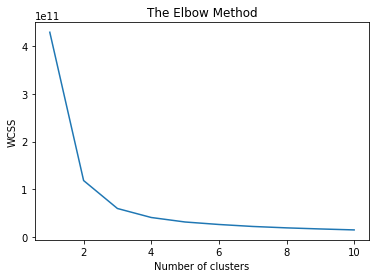

In [15]:
#use elbow method to determine the best number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#the result shows that the best number of clusters is 3

In [16]:
#run kmeans algo on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 1, 2, ..., 0, 0, 2])

In [17]:
#add the result as a new column to the dataset
arr=y_kmeans
X['cluster'] = arr.tolist()
X

,income,age,loan,cluster
0,66155.925095,59.017015,8106.532131,2
1,34415.153966,48.117153,6564.745018,1
2,57317.170063,63.108049,8020.953296,2
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,2
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,2
1996,69516.127573,23.162104,3503.176156,2
1997,44311.449262,28.017167,5522.786693,0
1998,43756.056605,63.971796,1622.722598,0


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [19]:
#normalize the trainig data 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [20]:
#excute LR model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#accuarcy after adding cluster number is 95.7%
#recall is 97.6% (the most important metric because ofthe unblance in data)

[[339   9]
 [  7  45]]


In [44]:
#ann model 
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Dropout

model=Sequential([Dense(4,activation='relu'),
                 Dense(16,activation='relu'),

                 Dense(32,activation='relu'),

                 Dense(1,activation='sigmoid'),
                 
                 ])
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
history=model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 150,verbose=2)


Epoch 1/150
50/50 - 0s - loss: 0.5102 - acc: 0.8556 - val_loss: 0.4146 - val_acc: 0.8700
Epoch 2/150
50/50 - 0s - loss: 0.3550 - acc: 0.8556 - val_loss: 0.3111 - val_acc: 0.8700
Epoch 3/150
50/50 - 0s - loss: 0.2918 - acc: 0.8556 - val_loss: 0.2633 - val_acc: 0.8700
Epoch 4/150
50/50 - 0s - loss: 0.2574 - acc: 0.8556 - val_loss: 0.2297 - val_acc: 0.8700
Epoch 5/150
50/50 - 0s - loss: 0.2265 - acc: 0.8556 - val_loss: 0.1973 - val_acc: 0.8700
Epoch 6/150
50/50 - 0s - loss: 0.1978 - acc: 0.8656 - val_loss: 0.1670 - val_acc: 0.9350
Epoch 7/150
50/50 - 0s - loss: 0.1705 - acc: 0.9212 - val_loss: 0.1402 - val_acc: 0.9475
Epoch 8/150
50/50 - 0s - loss: 0.1418 - acc: 0.9431 - val_loss: 0.1162 - val_acc: 0.9650
Epoch 9/150
50/50 - 0s - loss: 0.1175 - acc: 0.9625 - val_loss: 0.0992 - val_acc: 0.9625
Epoch 10/150
50/50 - 0s - loss: 0.0949 - acc: 0.9744 - val_loss: 0.0835 - val_acc: 0.9675
Epoch 11/150
50/50 - 0s - loss: 0.0763 - acc: 0.9781 - val_loss: 0.0755 - val_acc: 0.9675
Epoch 12/150
50/50 

Epoch 93/150
50/50 - 0s - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0165 - val_acc: 0.9950
Epoch 94/150
50/50 - 0s - loss: 0.0038 - acc: 0.9994 - val_loss: 0.0174 - val_acc: 0.9900
Epoch 95/150
50/50 - 0s - loss: 0.0032 - acc: 0.9994 - val_loss: 0.0203 - val_acc: 0.9875
Epoch 96/150
50/50 - 0s - loss: 0.0034 - acc: 0.9987 - val_loss: 0.0126 - val_acc: 0.9950
Epoch 97/150
50/50 - 0s - loss: 0.0040 - acc: 0.9994 - val_loss: 0.0134 - val_acc: 0.9950
Epoch 98/150
50/50 - 0s - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0137 - val_acc: 0.9950
Epoch 99/150
50/50 - 0s - loss: 0.0041 - acc: 0.9981 - val_loss: 0.0219 - val_acc: 0.9900
Epoch 100/150
50/50 - 0s - loss: 0.0034 - acc: 0.9987 - val_loss: 0.0176 - val_acc: 0.9925
Epoch 101/150
50/50 - 0s - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0208 - val_acc: 0.9925
Epoch 102/150
50/50 - 0s - loss: 0.0037 - acc: 0.9994 - val_loss: 0.0284 - val_acc: 0.9875
Epoch 103/150
50/50 - 0s - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0126 - val_acc: 0.9950
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

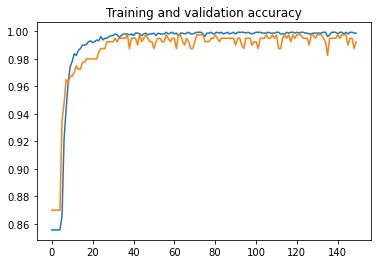

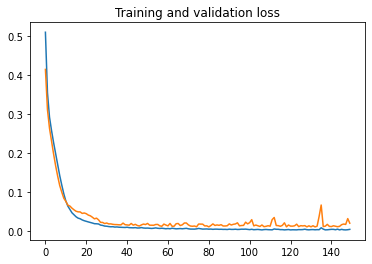

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


In [45]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#recall is 100% , acc=99.25 :)  
#ann does better here
#no need to do dropout here there is no overfitting

[[345   3]
 [  0  52]]
